<a href="https://colab.research.google.com/github/ScG4m3rLOL/Modelos_1_Udea_2025_2_Proyecto_Kaggle/blob/main/01-exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Competencia Kaggle
#####Modelos y Simulación I Udea 2025-2

###Importamos Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

###Comfiguracion Kaggle

In [2]:
try:
    import kaggle
    from kaggle.api.kaggle_api_extended import KaggleApi
    api = KaggleApi()
    api.authenticate()
except:
    print("Kaggle no configurado. Sube kaggle.json y ejecuta los comandos de configuración.")

Kaggle no configurado. Sube kaggle.json y ejecuta los comandos de configuración.


###Descarga de Datos

In [3]:
try:
    !kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia
    !unzip -q udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
    !ls -l *.csv
except Exception as e:
    print(f"Error en descarga: {e}")

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
unzip:  cannot find or open udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip, udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip.zip or udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip.ZIP.
ls: cannot access '*.csv': No such file or directory


###Carga de Datos

In [4]:
try:
    train = pd.read_csv('train.csv')
    print(f"Datos cargados: {train.shape}")
except:
    np.random.seed(42)
    n_samples = 1000
    train = pd.DataFrame({
        'ID': range(100000, 100000 + n_samples),
        'PERIODO_ACADEMICO': np.random.choice([20201, 20202, 20211, 20212], n_samples),
        'E_PRGM_ACADEMICO': np.random.choice(['INGENIERIA', 'MEDICINA', 'DERECHO', 'ADMINISTRACION'], n_samples),
        'E_PRGM_DEPARTAMENTO': np.random.choice(['BOGOTÁ', 'ANTIOQUIA', 'VALLE', 'ATLANTICO'], n_samples),
        'F_ESTRATOVIVIENDA': np.random.choice(['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4'], n_samples),
        'F_TIENEINTERNET': np.random.choice(['Sí', 'No'], n_samples),
        'F_TIENECOMPUTADOR': np.random.choice(['Sí', 'No'], n_samples),
        'INDICADOR_1': np.random.normal(0.5, 0.2, n_samples),
        'INDICADOR_2': np.random.normal(0.6, 0.15, n_samples),
        'RENDIMIENTO_GLOBAL': np.random.choice(['bajo', 'medio-bajo', 'medio-alto', 'alto'], n_samples)
    })
    print("Usando datos de ejemplo")

display(train.head())

Usando datos de ejemplo


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_TIENECOMPUTADOR,INDICADOR_1,INDICADOR_2,RENDIMIENTO_GLOBAL
0,100000,20211,MEDICINA,VALLE,Estrato 4,No,Sí,0.711987,0.522091,alto
1,100001,20212,DERECHO,ATLANTICO,Estrato 2,Sí,Sí,0.623401,0.548864,alto
2,100002,20201,INGENIERIA,ANTIOQUIA,Estrato 2,Sí,Sí,0.636714,0.664248,bajo
3,100003,20211,INGENIERIA,ATLANTICO,Estrato 4,Sí,Sí,0.226809,0.611573,medio-bajo
4,100004,20211,INGENIERIA,ATLANTICO,Estrato 1,No,No,0.742389,0.510928,medio-bajo


###Analisis de Datos

In [5]:
print("Tipos de datos:")
print(train.dtypes)

print("\nResumen estadístico:")
display(train.describe(include='all'))

null_analysis = train.isnull().sum()
null_summary = pd.DataFrame({
    'Valores_Nulos': null_analysis,
    'Porcentaje_Nulos': (null_analysis / len(train)) * 100
}).round(2)

nulls_exist = null_summary[null_summary['Valores_Nulos'] > 0]
if len(nulls_exist) > 0:
    print("Columnas con valores nulos:")
    display(nulls_exist.sort_values('Porcentaje_Nulos', ascending=False))

Tipos de datos:
ID                       int64
PERIODO_ACADEMICO        int64
E_PRGM_ACADEMICO        object
E_PRGM_DEPARTAMENTO     object
F_ESTRATOVIVIENDA       object
F_TIENEINTERNET         object
F_TIENECOMPUTADOR       object
INDICADOR_1            float64
INDICADOR_2            float64
RENDIMIENTO_GLOBAL      object
dtype: object

Resumen estadístico:


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_TIENECOMPUTADOR,INDICADOR_1,INDICADOR_2,RENDIMIENTO_GLOBAL
count,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000
unique,NaN,NaN,4,4,4,2,2,NaN,NaN,4
top,NaN,NaN,INGENIERIA,BOGOTÁ,Estrato 4,Sí,Sí,NaN,NaN,medio-bajo
freq,NaN,NaN,267,261,266,511,514,NaN,NaN,274
mean,100499.500000,20206.630000,NaN,NaN,NaN,NaN,NaN,0.500457,0.592550,NaN
std,288.819436,5.063471,NaN,NaN,NaN,NaN,NaN,0.200903,0.152408,NaN
min,100000.000000,20201.000000,NaN,NaN,NaN,NaN,NaN,-0.098227,0.148855,NaN
25%,100249.750000,20201.000000,NaN,NaN,NaN,NaN,NaN,0.357563,0.490752,NaN
50%,100499.500000,20211.000000,NaN,NaN,NaN,NaN,NaN,0.500707,0.591230,NaN
75%,100749.250000,20212.000000,NaN,NaN,NaN,NaN,NaN,0.636811,0.687392,NaN


####Analisis de Datos SocioEconomicos

,count
F_ESTRATOVIVIENDA,
Estrato 4,266
Estrato 2,258
Estrato 1,250
Estrato 3,226


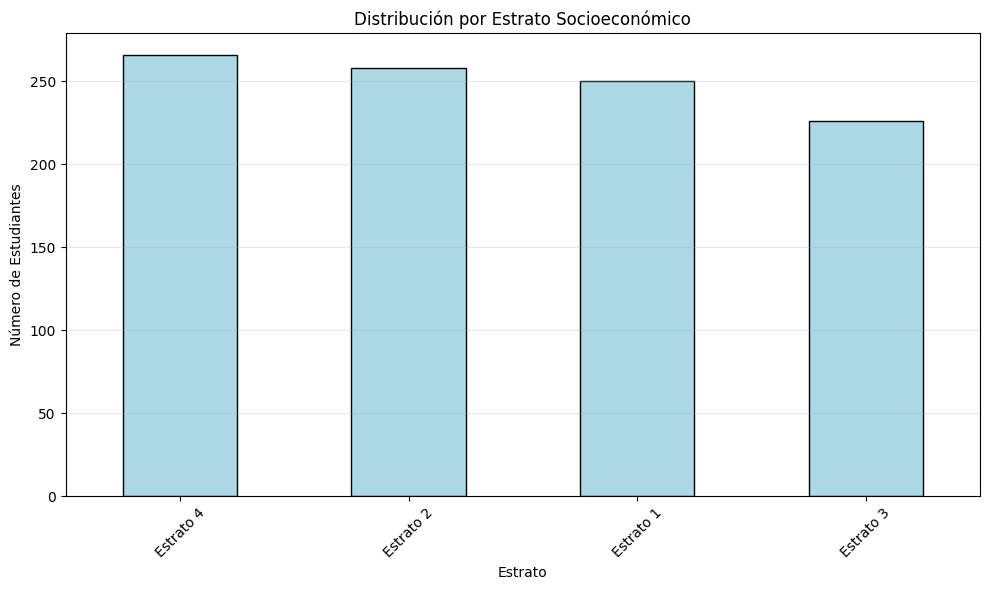

In [6]:
if 'F_ESTRATOVIVIENDA' in train.columns:
    estrato_counts = train['F_ESTRATOVIVIENDA'].value_counts()
    display(estrato_counts)

    plt.figure(figsize=(10, 6))
    estrato_counts.plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title('Distribución por Estrato Socioeconómico')
    plt.xlabel('Estrato')
    plt.ylabel('Número de Estudiantes')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

####Distribución del rendimiento académico

,count
RENDIMIENTO_GLOBAL,
medio-bajo,274
bajo,261
medio-alto,247
alto,218


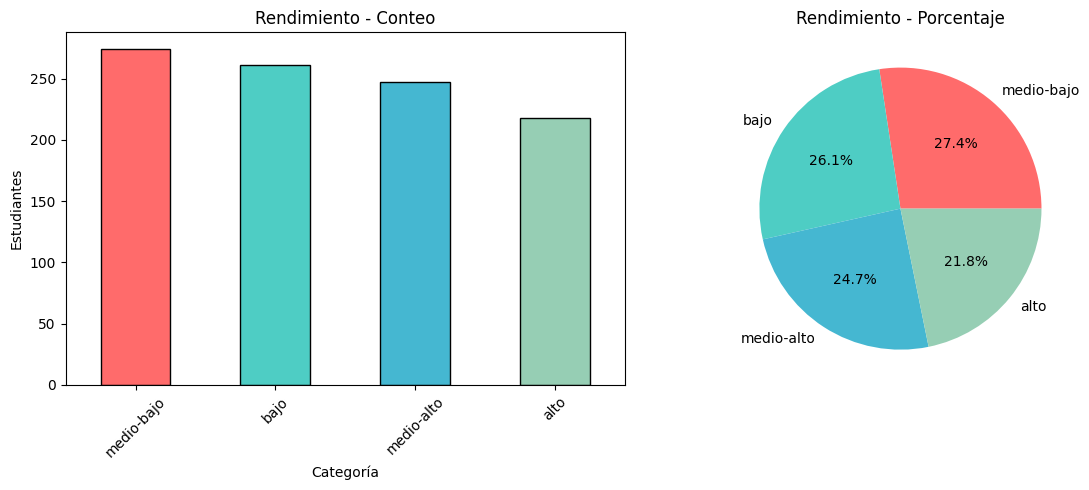

In [7]:
if 'RENDIMIENTO_GLOBAL' in train.columns:
    rendimiento_counts = train['RENDIMIENTO_GLOBAL'].value_counts()
    display(rendimiento_counts)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4']
    rendimiento_counts.plot(kind='bar', color=colors, edgecolor='black')
    plt.title('Rendimiento - Conteo')
    plt.xlabel('Categoría')
    plt.ylabel('Estudiantes')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    plt.pie(rendimiento_counts.values, labels=rendimiento_counts.index, autopct='%1.1f%%', colors=colors)
    plt.title('Rendimiento - Porcentaje')

    plt.tight_layout()
    plt.show()

####Relacion de Estrato e Indicadores

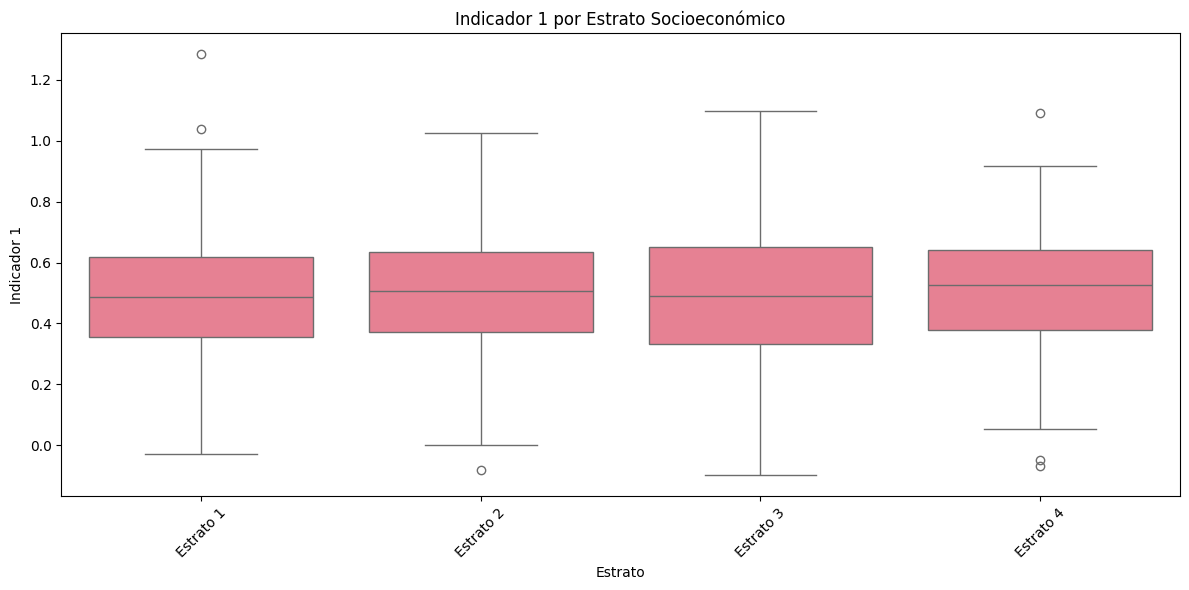

,mean,std,count
F_ESTRATOVIVIENDA,,,
Estrato 1,0.491,0.204,250
Estrato 2,0.503,0.196,258
Estrato 3,0.498,0.206,226
Estrato 4,0.508,0.199,266


In [8]:
if all(col in train.columns for col in ['F_ESTRATOVIVIENDA', 'INDICADOR_1']):
    estrato_order = ['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4']

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='F_ESTRATOVIVIENDA', y='INDICADOR_1', data=train, order=estrato_order)
    plt.title('Indicador 1 por Estrato Socioeconómico')
    plt.xlabel('Estrato')
    plt.ylabel('Indicador 1')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    indicador_stats = train.groupby('F_ESTRATOVIVIENDA')['INDICADOR_1'].agg(['mean', 'std', 'count']).round(3)
    display(indicador_stats)